In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA

In [153]:
import os
os.environ["OMP_NUM_THREADS"] = "2"


In [154]:
df=pd.read_csv("data_student.csv")
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5    UNS    258 non-null    object 
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


In [156]:
df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype='object')

In [157]:
df[" UNS"].value_counts(normalize=True)

 UNS
Middle      0.341085
Low         0.321705
High        0.244186
very_low    0.093023
Name: proportion, dtype: float64

In [158]:
df.isnull().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [159]:
df.drop(columns=[" UNS"],inplace=True)

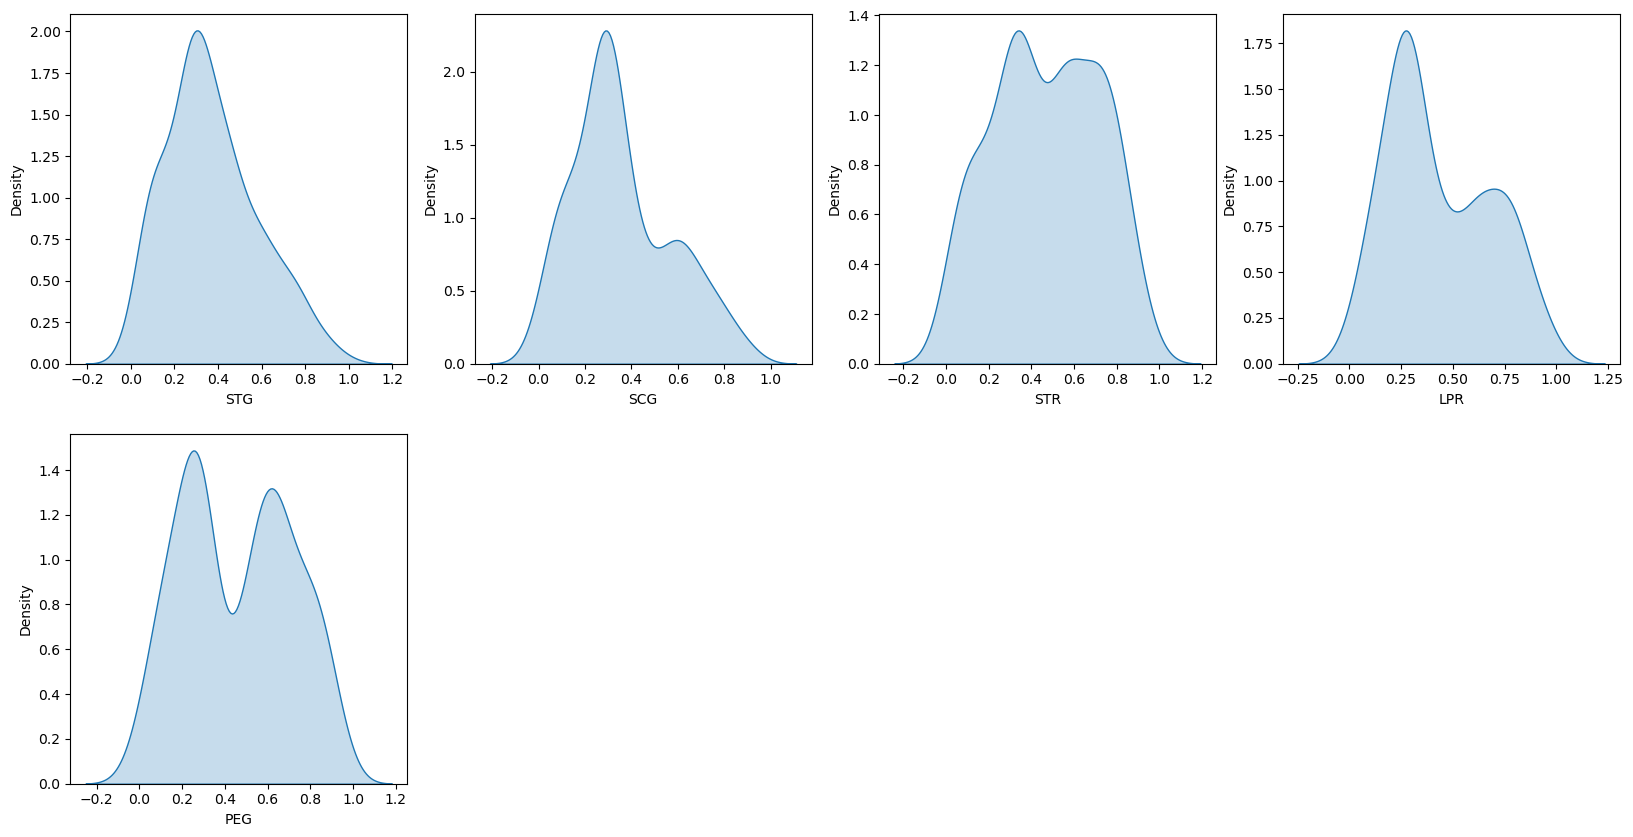

In [160]:
plt.figure(figsize=(20, 10))
for i,col in enumerate(df.columns,1):
    plt.subplot(2,4,i)
    sns.kdeplot(df[col],fill=True)
plt.show()

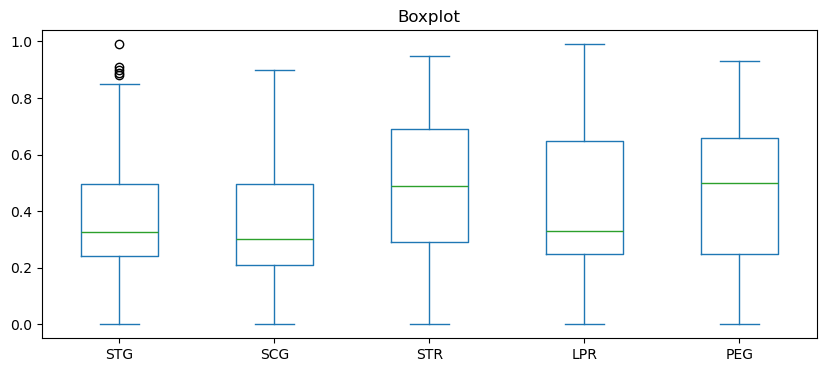

In [161]:
df.plot(kind="box", figsize=(10,4))
plt.title("Boxplot")
plt.show()

In [162]:
Q1 = np.percentile(df["STG"], 25)
Q3 = np.percentile(df["STG"], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace only the outlier values in STG with NaN
df.loc[(df["STG"] < lower_bound) | (df["STG"] > upper_bound), "STG"] = np.nan

# Fill NaN using backfill (use inplace or reassign)
df["STG"] = df["STG"].fillna(method="bfill")


C:\Users\ganesh\AppData\Local\Temp\ipykernel_1736\1902662805.py:12: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



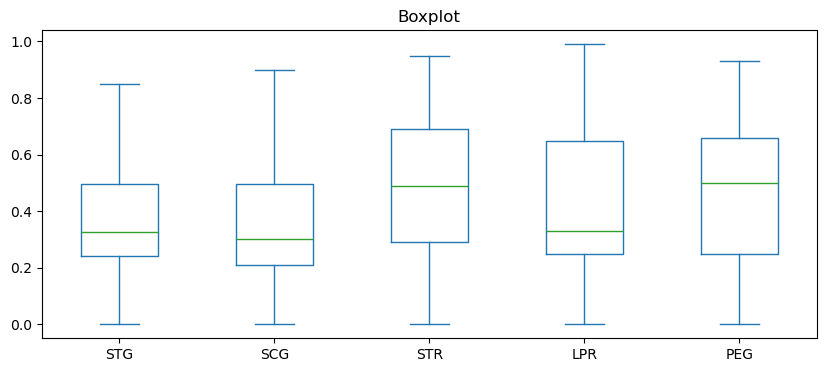

In [163]:
df.plot(kind="box", figsize=(10,4))
plt.title("Boxplot")
plt.show()

In [164]:
scaler=StandardScaler()
x=scaler.fit_transform(df)

c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

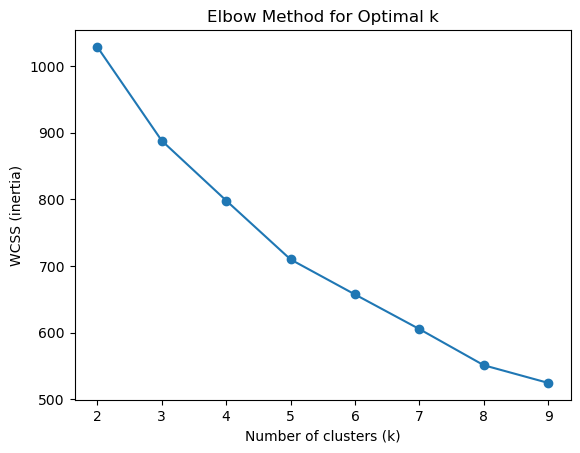

In [165]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [166]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)

In [167]:
best_score = -1
best_k_value = None   # store the best k
all_scores = []       # store all k & score

for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    all_scores.append([k, score])
    
    if score > best_score:
        best_score = score
        best_k_value = k

# Convert to DataFrame
res = pd.DataFrame(all_scores, columns=["K value", "Silhouette Score"])
print(res)

print(f"\nBest k = {best_k_value} with silhouette = {best_score:.4f}")


c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

   K value  Silhouette Score
0        2          0.278914
1        3          0.276210
2        4          0.281736
3        5          0.285243
4        6          0.278522
5        7          0.269292
6        8          0.256547
7        9          0.259863
8       10          0.266585

Best k = 5 with silhouette = 0.2852


In [168]:
kmeans=KMeans(n_clusters=5,random_state=42,n_init=50,)
res=[]
y_cluster=kmeans.fit_predict(X_pca)
kmeanssilhouette = silhouette_score(X_pca, y_cluster)
kmeansdb_index = davies_bouldin_score(X_pca, y_cluster)
kmeans_ch = calinski_harabasz_score(X_pca, y_cluster)
res.append([kmeanssilhouette,kmeansdb_index,kmeans_ch,kmeans.inertia_])
print("Silhouette Score:", kmeanssilhouette)
print("Davies-Bouldin Index:", kmeansdb_index)
print("calinski_harabasz_score:",kmeans_ch)


c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Silhouette Score: 0.2852430086580327
Davies-Bouldin Index: 1.0489129478910457
calinski_harabasz_score: 100.1934227058079


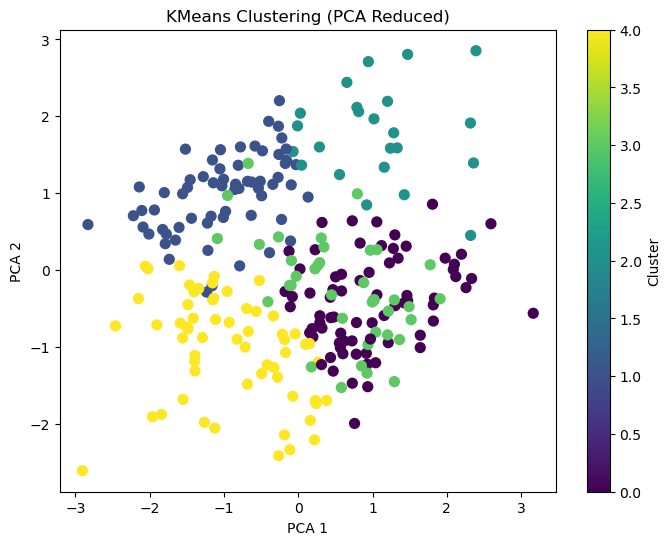

In [169]:

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],c=y_cluster, cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clustering (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()


In [170]:
import plotly.express as px
import pandas as pd
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_pca["Cluster"] = y_cluster
fig = px.scatter_3d(
    df_pca,
    x="PCA1", y="PCA2", z="PCA3",
    color="Cluster", 
    title="3D Cluster Plot (Interactive with Plotly)",
)
fig.show()


<Figure size 800x500 with 0 Axes>

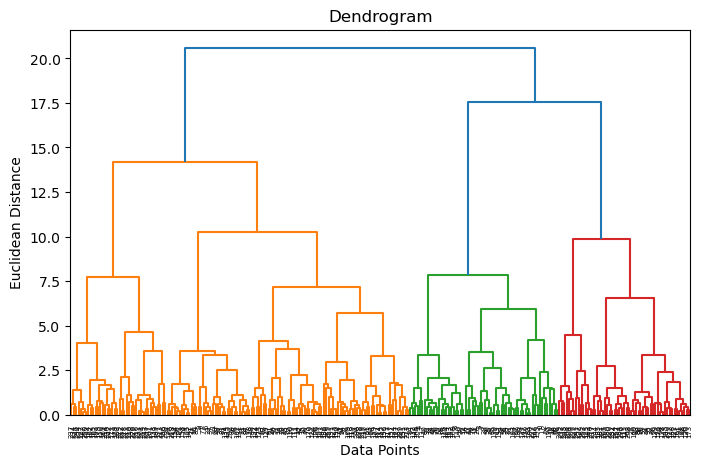

In [171]:

plt.figure(figsize=(8, 5))
dendrogram =plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show() 

In [172]:
best_score = -1
best_k_value = None
linkages = ["ward", "complete"]
linkage="null"
for link in linkages:
    for k in range(2, 8):
        hc = AgglomerativeClustering(n_clusters=k, linkage=link)
        labels = hc.fit_predict(X_pca)
        score = silhouette_score(X_pca, labels)
        print(f"linkage={link}, k={k}, silhouette={score:.4f}")
        if score > best_score:
            best_score = score
            best_k_value = k
            linkage=link
print(f"\nBest k = {best_k_value} with silhouette = {best_score:.4f} with linkage={linkage}")


linkage=ward, k=2, silhouette=0.2496
linkage=ward, k=3, silhouette=0.2554
linkage=ward, k=4, silhouette=0.2596
linkage=ward, k=5, silhouette=0.2178
linkage=ward, k=6, silhouette=0.2224
linkage=ward, k=7, silhouette=0.2124
linkage=complete, k=2, silhouette=0.2346
linkage=complete, k=3, silhouette=0.2340
linkage=complete, k=4, silhouette=0.2351
linkage=complete, k=5, silhouette=0.2517
linkage=complete, k=6, silhouette=0.2324
linkage=complete, k=7, silhouette=0.2257

Best k = 4 with silhouette = 0.2596 with linkage=ward


Silhouette Score: 0.25955857405625143
Davies-Bouldin Index: 1.1812953465192368
calinski_harabasz_score: 89.58140132145053


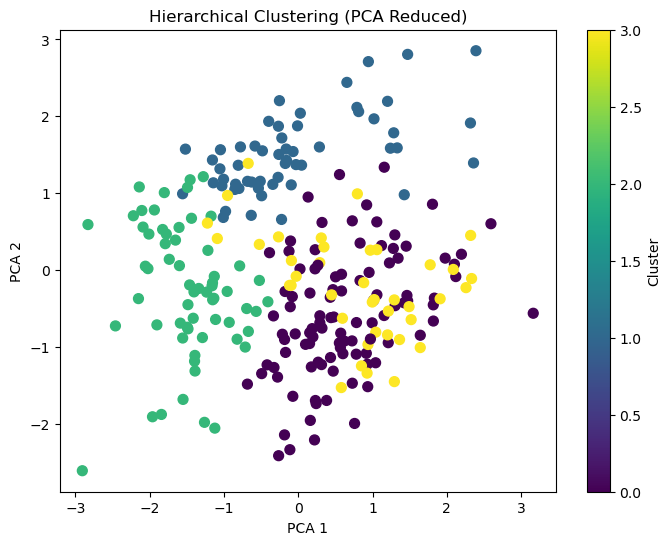

In [173]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hc.fit_predict(X_pca)
hcsilhouette = silhouette_score(X_pca, y_hc)
hcdb_index = davies_bouldin_score(X_pca, y_hc)
hc_ch = calinski_harabasz_score(X_pca, y_hc)
res.append([hcsilhouette,hcdb_index,hc_ch,np.nan])
print("Silhouette Score:", hcsilhouette)
print("Davies-Bouldin Index:", hcdb_index)
print("calinski_harabasz_score:",hc_ch)
# PCA 2D plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_hc, cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Hierarchical Clustering (PCA Reduced)")
plt.colorbar(label="Cluster")
plt.show()


In [174]:
import plotly.express as px
import pandas as pd
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_pca["Cluster"] = y_hc
fig = px.scatter_3d(
    df_pca,
    x="PCA1", y="PCA2", z="PCA3",
    color="Cluster", 
    title="3D Cluster Plot (Interactive with Plotly)",
)
fig.show()


In [175]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

best_score = -1
best_params = None

for eps in np.arange(0.3, 1.5, 0.2):   # try eps from 0.3 to 1.3
    for min_samples in [3, 5, 10]:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)
        labels = db.labels_
        
        # Skip if only one cluster or all noise
        if len(set(labels)) <= 1 or (set(labels) == {-1}):
            continue
        
        score = silhouette_score(x, labels)
        print(f"eps={eps:.2f}, min_samples={min_samples}, silhouette={score:.4f}")
        
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

print(f"\nBest params = eps={best_params[0]}, min_samples={best_params[1]} with silhouette={best_score:.4f}")


eps=0.30, min_samples=3, silhouette=-0.3276
eps=0.30, min_samples=5, silhouette=-0.1604
eps=0.50, min_samples=3, silhouette=-0.2165
eps=0.50, min_samples=5, silhouette=-0.1532


eps=0.50, min_samples=10, silhouette=-0.1558
eps=0.70, min_samples=3, silhouette=0.0663
eps=0.70, min_samples=5, silhouette=-0.0845
eps=0.70, min_samples=10, silhouette=0.0151
eps=0.90, min_samples=3, silhouette=0.2330
eps=0.90, min_samples=5, silhouette=0.2120
eps=0.90, min_samples=10, silhouette=0.1799
eps=1.10, min_samples=3, silhouette=0.2804
eps=1.10, min_samples=5, silhouette=0.2582
eps=1.10, min_samples=10, silhouette=0.2275
eps=1.30, min_samples=10, silhouette=0.2675

Best params = eps=1.1, min_samples=3 with silhouette=0.2804


Silhouette Score: 0.05497292802252821
Davies-Bouldin Index: 2.923713748657686
Calinski-Harabasz Score: 4.77404583630431


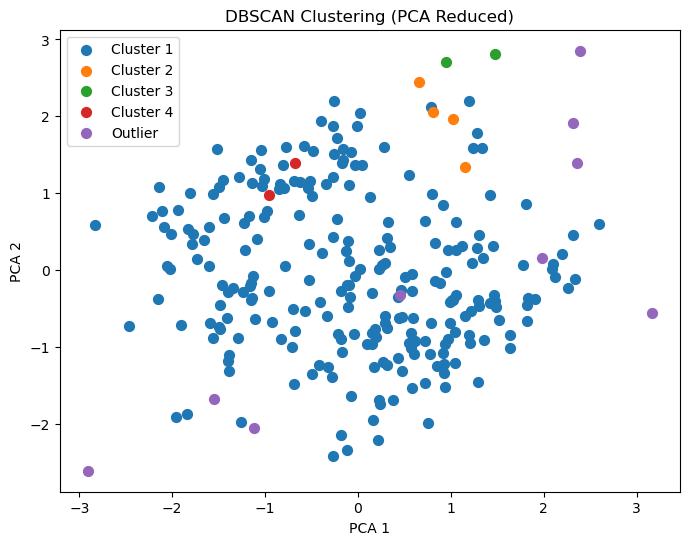

In [176]:
dbscan = DBSCAN(eps=0.8, min_samples=2)
y_db = dbscan.fit_predict(X_pca)
y_db_mapped = []
for label in y_db:
    if label == -1:
        y_db_mapped.append("Outlier")
    else:
        y_db_mapped.append(f"Cluster {label+1}")
y_db_mapped = np.array(y_db_mapped)
if len(set(y_db)) > 1:
    db_sil = silhouette_score(X_pca, y_db)
    db_db = davies_bouldin_score(X_pca, y_db)
    db_ch = calinski_harabasz_score(X_pca, y_db)
else:
    db_sil, db_db, db_ch = np.nan, np.nan, np.nan
res.append([db_sil, db_db, db_ch, np.nan])
print("Silhouette Score:", db_sil)
print("Davies-Bouldin Index:", db_db)
print("Calinski-Harabasz Score:", db_ch)
plt.figure(figsize=(8,6))
for label in np.unique(y_db_mapped):
    mask = y_db_mapped == label
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=label, s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBSCAN Clustering (PCA Reduced)")
plt.legend()
plt.show()


In [177]:
dfs=pd.DataFrame(res[:3],columns=["silhouette score","davis_bouldin_score","calinski_harabasz_score","inertia"],index=["Kmean","hierechical","DBscan"])
dfs

,silhouette score,davis_bouldin_score,calinski_harabasz_score,inertia
Kmean,0.285243,1.048913,100.193423,351.020992
hierechical,0.259559,1.181295,89.581401,NaN
DBscan,0.054973,2.923714,4.774046,NaN


In [178]:
import joblib

# Save your trained models and scaler
joblib.dump(kmeans, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']